In [49]:
from statsbombpy import sb

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap

from statsbombpy import sb

import os

import warnings
warnings.filterwarnings("ignore")

email = "nathan.talbot@etu.uca.fr"
password = os.environ["mdp_statsbomb"]
creds = {"user" : email, "passwd" : password}

In [337]:
liste_df = []
i = 0
liste_annee = ["2023_2024", "2022_2023", "2021_2022", "2020_2021"]
import ast
for annee in liste_annee :
    df_annee = pd.DataFrame(columns = ["match"])
    liste_match = pd.read_excel(f"../../Data/Event SB ligue 2/{annee}/liste_match.xlsx", index_col = 0).squeeze()
    serie_match = []
    for match in liste_match :
        df = pd.DataFrame()
        event = pd.read_excel(f"../../Data/Event SB ligue 2/{annee}/{match}.xlsx", index_col = 0)
        event.location = event.location.fillna("[60, 40]").apply(ast.literal_eval)
        goal = event[(event.shot_outcome == "Goal") & (event.shot_type != "Penalty")]
        if len(goal) > 0 :
            pos_change_side = goal[pd.DataFrame(goal.location.tolist(), index = goal.index)[0] > 60].possession
            deb_action = pd.DataFrame(columns = event.columns)
            for ind in goal.index :
                deb_action.loc[ind] = event[(event.possession == goal.loc[ind, "possession"]) & (event.period == goal.loc[ind, "period"])].iloc[0]
            loc_deb_action = pd.DataFrame(deb_action.location.tolist(), index = deb_action.index)
            df = pd.concat([df, pd.concat([loc_deb_action, deb_action.possession, deb_action.possession_team], axis = 1)], axis = 0)
            df.loc[df.possession.isin(pos_change_side), [0, 1]] = [120, 80] - df[df.possession.isin(pos_change_side)][[0, 1]]
            i += 1
        df_annee = pd.concat([df_annee, df], axis = 0, ignore_index = True)
        serie_match += [f"{match}"]*len(df)
    df_annee["match"] = serie_match
    liste_df.append(df_annee)
    break


In [338]:
df_annee

,match,0,1,possession,possession_team,2
0,3896699,0.0,79.9,172,Dunkerque,NaN
1,3937511,37.0,68.3,8,Paris FC,NaN
2,3937511,80.3,0.0,50,Rodez,NaN
3,3937511,0.0,79.9,145,Paris FC,NaN
4,3937846,11.0,79.9,146,Saint-Étienne,NaN
...,...,...,...,...,...,...
825,3896597,42.2,65.1,65,Caen,NaN
826,3896596,75.5,33.2,91,Amiens,NaN
827,3896595,105.5,39.4,78,Bastia,NaN
828,3896595,41.3,0.0,166,Bastia,NaN


Text(0.5, 0.5, "Heatmap des débuts d'actions menant à un but en ligue 2")

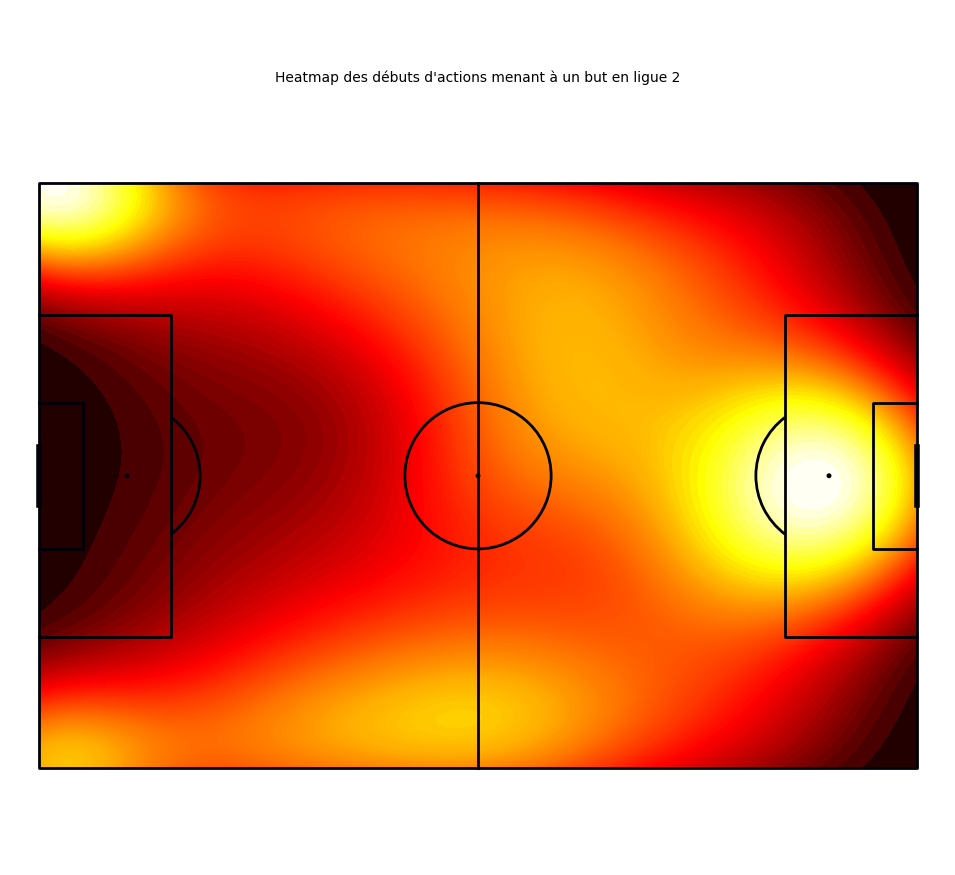

In [371]:
pitch = Pitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.grid(axis = False)
kde = pitch.kdeplot(df_annee[0], df_annee[1], ax=ax['pitch'], fill = True, levels=100, thresh=0, cmap='hot')
ax["title"].text(0.5, 0.5, "Heatmap des débuts d'actions menant à un but en ligue 2", va = "center", ha = "center")

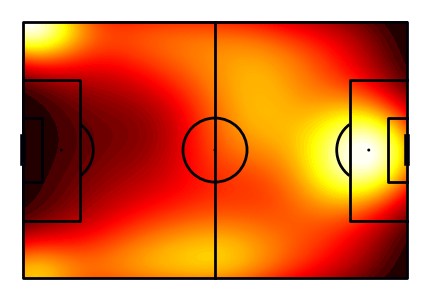

In [352]:
pitch = Pitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(df_annee[0], df_annee[1], ax=ax, fill = True, levels=100, cut = 4, thresh=0, cmap='hot')